In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)


        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels, **kwargs):
            self.set_thetagrids(np.degrees(theta), labels, **kwargs)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.6, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [ ]:
!ls drive/MyDrive/advb_data

pivot_CityShop_all_orders.csv	  pivot_Group2_buyed_orders.csv
pivot_CityShop_buyed_orders.csv   pivot_Month_all_orders.csv
pivot_DayOfWeek_all_orders.csv	  pivot_Month_buyed_orders.csv
pivot_DayOfWeek_buyed_orders.csv  pivot_Payment_all_orders.csv
pivot_Delivery_all_orders.csv	  pivot_Payment_buyed_orders.csv
pivot_Delivery_buyed_orders.csv   pivot_Time_all_orders.csv
pivot_Geo_all_orders.csv	  pivot_Time_buyed_orders.csv
pivot_Geo_buyed_orders.csv	  vitrina_with_clusters_4.csv
pivot_Group2_all_orders.csv


In [ ]:
import pandas as pd

In [ ]:
BASE_DIR = "drive/MyDrive/advb_data/"

In [ ]:
vitrina_with_clusters = pd.read_csv(BASE_DIR + "vitrina_with_clusters_4.csv", sep=';')

In [ ]:
vitrina_with_clusters.columns

Index(['Абсолютная маржа_buyed', 'Маржа_buyed', 'Средняя маржа_buyed',
       'Средний чек_buyed', 'Кол-во чеков_buyed', 'Кол-во товаров_buyed',
       'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
       'Кол-во чеков_all', 'Кол-во товаров_all',
       'Кол-во уникальных клиентов_all', 'Ценность клиента_all',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ОБУВЬ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'Безналичная', 'Наличная', 'ИнтернетДоставка',
       'Калуга', 'Москва', 'Ростов-на-Дону', 'Саратов', 'Другой', 'Labels'],
      dtype='object')

In [ ]:
vitrina_with_clusters

,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,Абсолютная маржа_all,...,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,Безналичная,Наличная,ИнтернетДоставка,Калуга,Москва,Ростов-на-Дону,Саратов,Другой,Labels
0,2271,0.604150,2271.0,4819,1,7,7,1,2271,2729,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,2176,0.654436,2176.0,3325,1,1,1,1,2176,2176,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,204,0.386364,204.0,528,1,4,4,1,204,204,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,759,0.345628,379.5,1147,2,6,3,1,759,1784,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
4,1510,0.242026,755.0,3449,2,9,4,1,1510,1649,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43719,1062,0.743697,1062.0,1477,1,1,1,1,1062,1062,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
43720,217,0.333846,217.0,3560,1,1,1,1,217,217,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
43721,148,0.334086,148.0,542,1,1,1,1,148,148,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
43722,38,0.101333,38.0,474,1,1,1,1,38,38,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
mean_values = vitrina_with_clusters.groupby("Labels")[['Средняя маржа_buyed',
       'Средний чек_buyed', 'Кол-во чеков_buyed', 'Кол-во товаров_buyed',
       'Ценность клиента_buyed']].mean()

In [ ]:
for col in mean_values.columns:
    mean_values[col + "_norm"] = mean_values[col] / mean_values[col].max()

In [ ]:
mean_values_norm = mean_values[['Средняя маржа_buyed_norm', 'Средний чек_buyed_norm', 
             'Кол-во чеков_buyed_norm', 'Кол-во товаров_buyed_norm',
             'Ценность клиента_buyed_norm']]

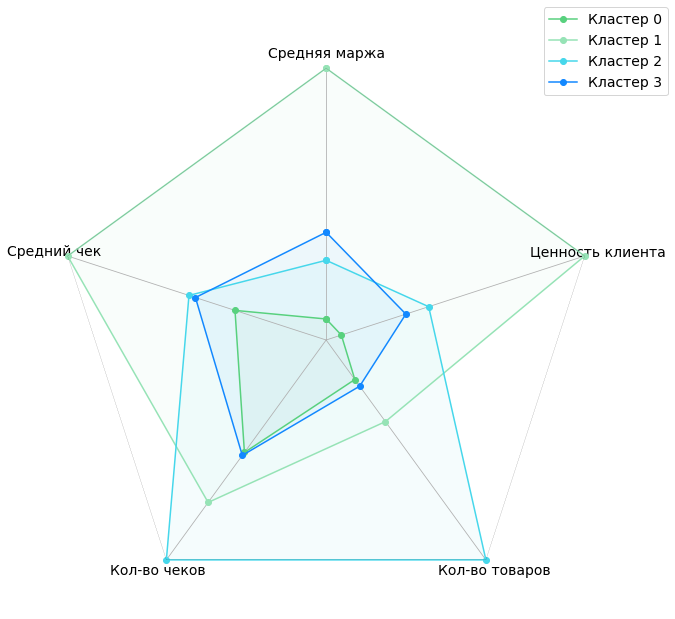

In [ ]:
N = 5
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(14, 10), nrows=1, ncols=1,
                        subplot_kw=dict(projection='radar'))
[i.set_linewidth(0.1) for i in ax.spines.values()]
colors = ["#58d17e", "#96e3b6", "#46d7eb", "#1288ff"]
data = mean_values_norm
labels = []
spoke_labels = list(map(lambda x: x[:x.index('_')], data.columns))
ax.set_rgrids([])
ax.set_rlim([0, 1])
for i, (d, color) in enumerate(zip(data.iterrows(), colors)):
    label, d = ("Кластер " + str(d[0]), np.array(d[1].tolist()))
    labels.append(label)
    ax.plot(theta, d, marker="o", color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.05, label='_nolegend_')
ax.set_varlabels(spoke_labels, fontsize=14)
legend = ax.legend(labels, loc=(0.9, .95), fontsize=14)
bbox = dict(boxstyle="round", ec="limegreen", fc="limegreen", alpha=1)
plt.savefig("cluster_value.png", format="png")
plt.show()

In [ ]:
GOODS = [
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 
       'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 
       'ПОДГУЗНИКИ', 
       'ИГРУШКИ', 
       'ОБУВЬ', 
       'КОСМЕТИКА/ГИГИЕНА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ']

In [ ]:
for good in GOODS:
    vitrina_with_clusters[good] = (vitrina_with_clusters[good] * vitrina_with_clusters["Кол-во товаров_buyed"]).astype(int)

In [ ]:
mean_values = vitrina_with_clusters.groupby("Labels")[GOODS].mean()

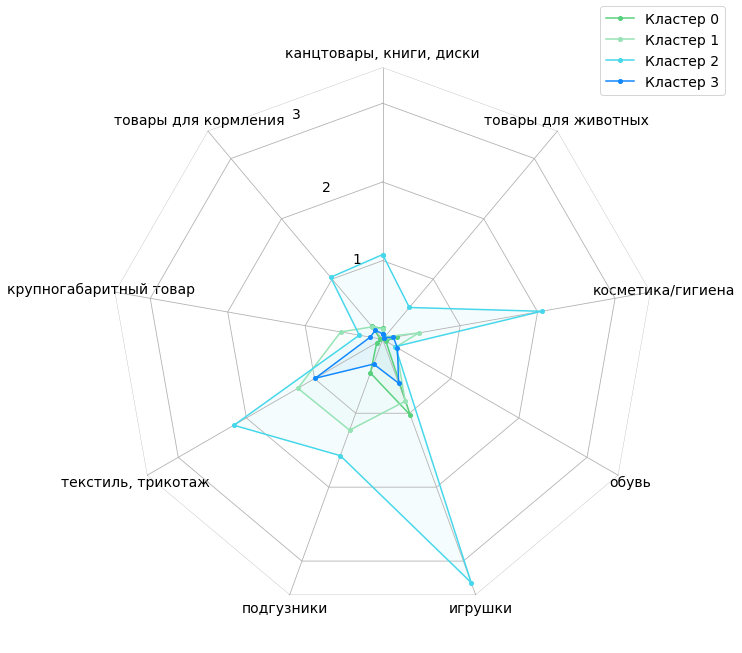

In [ ]:
N = len(mean_values.columns)
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(14, 10), nrows=1, ncols=1,
                        subplot_kw=dict(projection='radar'))
[i.set_linewidth(0.1) for i in ax.spines.values()]
colors = ["#58d17e", "#96e3b6", "#46d7eb", "#1288ff"]
data = mean_values
labels = []
spoke_labels = list(map(lambda s: s.lower(), data.columns))
ax.set_rgrids([1, 2, 3], fontsize=14)
for i, (d, color) in enumerate(zip(data.iterrows(), colors)):
    label, d = ("Кластер " + str(d[0]), np.array(d[1].tolist()))
    labels.append(label)
    ax.plot(theta, d, marker="o", markersize=4, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.05, label='_nolegend_')
ax.set_varlabels(spoke_labels, fontsize=14)
plt.draw()

legend = ax.legend(labels, loc=(0.9, .95), fontsize=14)
bbox = dict(boxstyle="round", ec="limegreen", fc="limegreen", alpha=1)
plt.savefig("cluster_goods_amount.png", format="png")
plt.show()

In [ ]:
for good in GOODS:
    vitrina_with_clusters[good + "_inside"] = (vitrina_with_clusters[good] > 0).astype(int)

In [ ]:
GOODS_INSIDE = [good + "_inside" for good in GOODS]

In [ ]:
mean_values = vitrina_with_clusters.groupby("Labels")[GOODS_INSIDE].mean()

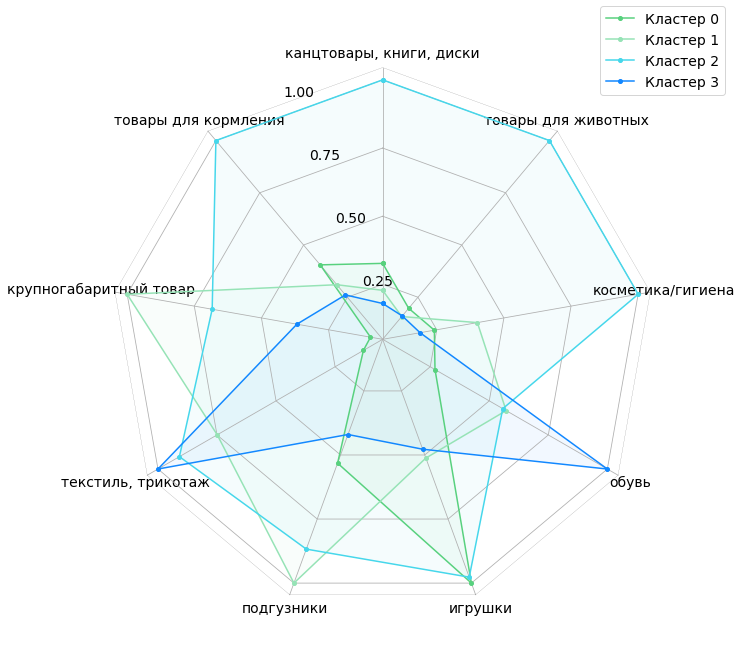

In [ ]:
N = len(GOODS)
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(14, 10), nrows=1, ncols=1,
                        subplot_kw=dict(projection='radar'))
[i.set_linewidth(0.1) for i in ax.spines.values()]
colors = ["#58d17e", "#96e3b6", "#46d7eb", "#1288ff"]
data = mean_values
for col in data.columns:
    data[col] /= data[col].max()
labels = []
spoke_labels = list(map(lambda s: s.lower(), GOODS))
ax.set_rgrids([0.25, 0.5, 0.75, 1], fontsize=14)
for i, (d, color) in enumerate(zip(data.iterrows(), colors)):
    label, d = ("Кластер " + str(d[0]), np.array(d[1].tolist()))
    labels.append(label)
    ax.plot(theta, d, marker="o", markersize=4, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.05, label='_nolegend_')
ax.set_varlabels(spoke_labels, fontsize=14)
plt.draw()

legend = ax.legend(labels, loc=(0.9, .95), fontsize=14)
bbox = dict(boxstyle="round", ec="limegreen", fc="limegreen", alpha=1)
plt.savefig("cluster_relative_goods.png", format="png")
plt.show()

In [ ]:
claster_0 = vitrina_with_clusters[vitrina_with_clusters['Labels'] == 0]
claster_1 = vitrina_with_clusters[vitrina_with_clusters['Labels'] == 1]
claster_2 = vitrina_with_clusters[vitrina_with_clusters['Labels'] == 2]
claster_3 = vitrina_with_clusters[vitrina_with_clusters['Labels'] == 3]